# Una primera prueba de KNN y PCA (10,10)

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import time
import seaborn as sns
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("./data/fashion-mnist_train.csv")

In [3]:
df_val = pd.read_csv("./data/fashion-mnist_test.csv")
y_val = df_val["label"]
X = df.iloc[:,1:]
y = df["label"]

In [4]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score
X_train, X_test, y_train, y_test = train_test_split(X,y)
model = KNeighborsClassifier(10)

start = time.perf_counter()
model.fit(X_train,y_train)
model_results = model.predict(X_test)

end = time.perf_counter()
print("El tiempo de ejecucion fue de ", end-start, " segundos")

El tiempo de ejecucion fue de  47.81652360600128  segundos


In [7]:
accuracy_score(model_results,y_test)

0.8517333333333333

In [8]:
from sklearn.metrics import classification_report

pd.DataFrame(classification_report(y_test,model_results, output_dict=True))

,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.778726,0.986534,0.748459,0.900069,0.785288,0.991797,0.633813,0.862932,0.973233,0.887768,0.851733,0.854862,0.854839
recall,0.884367,0.952120,0.805574,0.869303,0.763039,0.802256,0.580153,0.953259,0.945964,0.956522,0.851733,0.851256,0.851733
f1-score,0.828191,0.969022,0.775967,0.884419,0.774004,0.887014,0.605797,0.905849,0.959405,0.920863,0.851733,0.851053,0.851269
support,1548.000000,1462.000000,1507.000000,1492.000000,1553.000000,1507.000000,1441.000000,1519.000000,1499.000000,1472.000000,0.851733,15000.000000,15000.000000


## (1) Uso de PCA

In [9]:
PCA_mod = PCA(10)
PCA_mod.fit(X_train)
start = time.perf_counter()
X_train_PCA = PCA_mod.transform(X_train)
X_test_PCA = PCA_mod.transform(X_test)
end = time.perf_counter()
print("El tiempo de ejecucion de PCA fue de ", end-start, " segundos")

El tiempo de ejecucion de PCA fue de  0.3981879460006894  segundos


In [10]:
modelo_pca_prueba = KNeighborsClassifier(10)
start = time.perf_counter()

modelo_pca_prueba.fit(X_train_PCA,y_train)
model_pca_results = modelo_pca_prueba.predict(X_test_PCA)

end = time.perf_counter()

pd.DataFrame(classification_report(y_test,model_pca_results, output_dict=True))

,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.774925,0.968220,0.679605,0.828217,0.709163,0.912561,0.572605,0.872599,0.942933,0.895750,0.816733,0.815658,0.815610
recall,0.838501,0.937756,0.685468,0.849866,0.687701,0.872595,0.530881,0.897301,0.947965,0.916440,0.816733,0.816448,0.816733
f1-score,0.805461,0.952745,0.682524,0.838902,0.698267,0.892130,0.550954,0.884778,0.945442,0.905977,0.816733,0.815718,0.815836
support,1548.000000,1462.000000,1507.000000,1492.000000,1553.000000,1507.000000,1441.000000,1519.000000,1499.000000,1472.000000,0.816733,15000.000000,15000.000000


In [11]:
print("El tiempo de ejecucion fue de ", end-start, " segundos")

El tiempo de ejecucion fue de  1.4302329079982883  segundos


## (2) Distribucion y orden de los datos, pruebas con submuestras de nuestro set de datos

Queremos saber como se distribuye y ordena el set de datos para poder usar submuestras del mismo. Esto es para ver si vale la pena usarlas para hacer que las ejecuciones de los experimentos sean mas rapidas. 
Adem\'as, una distribucion uniforme de las etiquetas nos dara pie a utilizar como principal metrica a 'accuracy'.

In [12]:
df = pd.DataFrame((y.sort_values()).value_counts())
df

,label
0,6000
1,6000
2,6000
3,6000
4,6000
5,6000
6,6000
7,6000
8,6000
9,6000


In [13]:
submuestra_y = pd.DataFrame((y[:1000].sort_values()).value_counts())
submuestra_y

,label
4,114
3,112
0,108
6,106
7,102
2,99
8,96
9,91
1,89
5,83


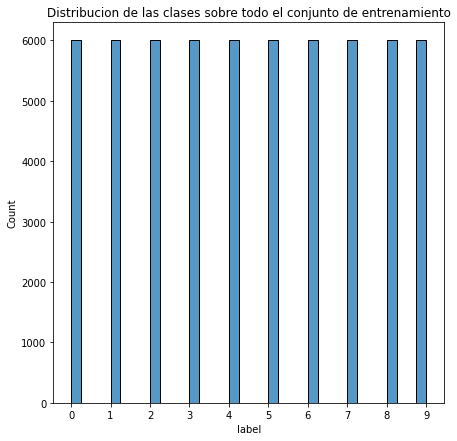

In [14]:
import matplotlib.pyplot as plt
tck = np.arange(0,10,1)
plt.figure(figsize=(7,7))
sns.histplot(y)
plt.xticks(tck)
plt.title("Distribucion de las clases sobre todo el conjunto de entrenamiento")
plt.savefig("./graficos/dist-clases-train-todas")

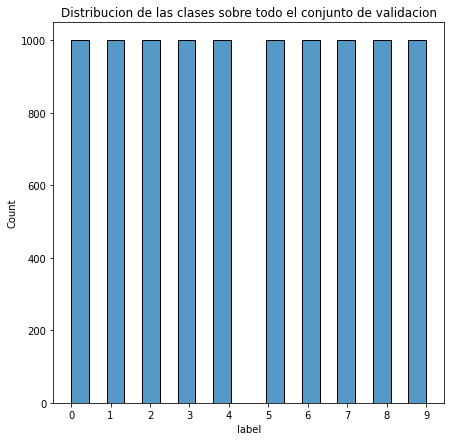

In [15]:
plt.figure(figsize=(7,7))
sns.histplot(y_val)
plt.xticks(tck)
plt.title("Distribucion de las clases sobre todo el conjunto de validacion")
plt.savefig("./graficos/dist-clases-val-todas")

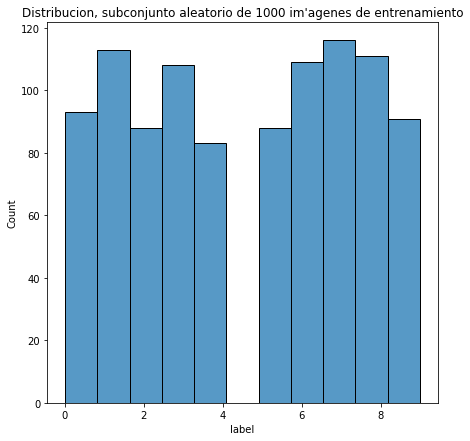

In [16]:
plt.figure(figsize=(7,7))
plt.title("Distribucion, subconjunto aleatorio de 1000 im\'agenes de entrenamiento")
sns.histplot(y.sample(frac = 1)[:1000])
plt.savefig("./graficos/dist-clases-train-1000")

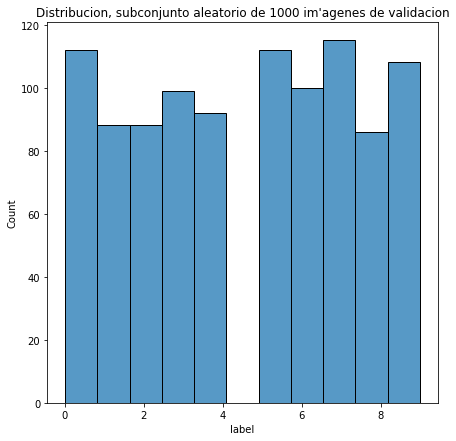

In [17]:
plt.figure(figsize=(7,7))
plt.title("Distribucion, subconjunto aleatorio de 1000 im\'agenes de validacion")
sns.histplot(y_val.sample(frac = 1)[:1000])
plt.savefig("./graficos/dist-clases-val-1000")

Evidentemente nuestro dataset esta uniformemente distrubuido. Pero al tomar submuestras parece haber cierto orden en la aparicion de los datos. Nos tomaremos el trabajo de desordenarlo aleatoriamente para obtener submuestras mas uniformes. 

In [18]:
y2 = y.sample(frac = 1)

<AxesSubplot:xlabel='label', ylabel='Count'>

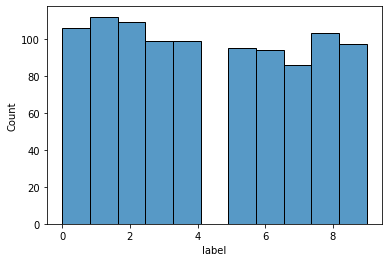

In [19]:
submuestra_y2_1000 = pd.DataFrame((y2[:1000]).value_counts())
submuestra_y2_1000

sns.histplot(y2[:1000])

La uniformidad empeoro desordenando mas el dataset. 

In [20]:
submuestra_y2_10000 = pd.DataFrame((y2[:10000].sort_values()).value_counts())
submuestra_y2_10000

,label
1,1033
4,1025
5,1025
0,1018
8,1017
9,1004
2,981
7,981
6,972
3,944


<AxesSubplot:xlabel='label', ylabel='Count'>

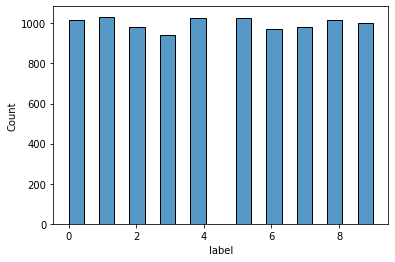

In [21]:
sns.histplot(y2[:10000])

Para una muestra de tamanio relativamente chico, los datos no estan muy uniformemente distribuidos. Sin embargo a mayor cantidad de muestras mayor la uniformidad del set de datos. Vamos a evaluar como se desempenia nuestro modelo tomando este numero de muestras... 

### Entrenamiento con un subconjunto

In [22]:
X_reducido = X.iloc[:10000,:]
X_reducido
y_reducido = y[:10000]
y_reducido

0       2
1       9
2       6
3       0
4       3
       ..
9995    2
9996    7
9997    8
9998    5
9999    5
Name: label, Length: 10000, dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_reducido,y_reducido)
model = KNeighborsClassifier(10)

start = time.perf_counter()
model.fit(X_train,y_train)
model_results = model.predict(X_test)

end = time.perf_counter()

In [24]:
print("Con 10000 muestras el entrenamiento tardo ", end-start, "segundos")

metrics = classification_report(model_results, y_test,output_dict=True)
pd.DataFrame(metrics)

Con 10000 muestras el entrenamiento tardo  1.021294491001754 segundos


,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.863830,0.941423,0.723140,0.859922,0.727273,0.694444,0.530075,0.932075,0.892116,0.953975,0.8088,0.811827,0.817413
recall,0.722420,0.991189,0.697211,0.846743,0.780488,0.972222,0.555118,0.796774,0.964126,0.853933,0.8088,0.818022,0.808800
f1-score,0.786822,0.965665,0.709939,0.853282,0.752941,0.810185,0.542308,0.859130,0.926724,0.901186,0.8088,0.810818,0.809445
support,281.000000,227.000000,251.000000,261.000000,246.000000,180.000000,254.000000,310.000000,223.000000,267.000000,0.8088,2500.000000,2500.000000


# Conclusiones 
Hemos tanteado un poco el dataframe y los metodos que utilizaremos para el primer experimento principal, que sera el de encontrar el mejor par de parametros para KNN y PCA. 
La performance tomando 10k de muestras es buena, pero podemos tener una que tome un segundo mas y tenga mejores metricas utilizando todo el dataset y aplicando PCA.

# El mejor par $k,\alpha$ (proxima notebook)
En la proxima notebook correremos el 